# **Some metrics to measure images similarity**
* package sewar: https://sewar.readthedocs.io/en/latest/
* repo sewar: https://github.com/andrewekhalel/sewar
* paper: https://arxiv.org/pdf/2101.08629.pdf

In [1]:
pip install sewar

  Created wheel for sewar: filename=sewar-0.4.4-py3-none-any.whl size=10388 sha256=6cac4aac7709483cb8ecd0d8f323292dca0bb6d0243d9e530507e5c67d927aba
  Stored in directory: /home/frank/.cache/pip/wheels/8f/69/86/3ab3f51f40f4275e1964732cfc0322131e89f366ec88d646c9
Successfully built sewar
Note: you may need to restart the kernel to use updated packages.


In [76]:
import imageio
import matplotlib.pyplot as plt
import sewar
import os
from skimage.transform import resize
import numpy as np
from skimage import img_as_ubyte#to make numpy array ranges from 0->255
import csv

## Eval function

In [43]:
def image_eval(original, artificial):
    #print("Structural Similarity Index:")
    ssmi = sewar.ssim(original, artificial)# return tuple – ssim value, cs value.
   
    msi = sewar.msssim(original, artificial)# return float – ms-ssim value.
    
    return ssmi, msi

## Reading real WL and artificial NBI images

In [37]:
real_wl = '/home/frank/Documentos/UIS/Tesis/Polipos/DataSet/PolypDatasetProcesed/WL/'
classes = os.listdir(real_wl)
print(classes)

path1 = '../data/wl2nbi/fake_images_ck4/'
classes2 = os.listdir(path1)
print(classes2)

['serrated_WL', 'hiperplastic_WL', 'adenoma_WL']
['serrated_WL', 'hiperplastic_WL', 'adenoma_WL']


In [84]:
with open('imageSimilarity.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    
    real_wl = '/home/frank/Documentos/UIS/Tesis/Polipos/DataSet/PolypDatasetProcesed/WL/'
    art_nbi = '../data/wl2nbi/fake_images_ck4/'
    classes = os.listdir(real_wl)
    ssmi_results, msi_results = [], []

    for classe in classes:
        print("===== clase: ", classe, "=====")
        clase_path = real_wl + classe + '/'
        videos = os.listdir(clase_path)
        for video in videos:
            print("===== video: ", video, "=====")
            video_path = clase_path + video
            imgs = os.listdir(video_path)
            for img in imgs:
                realWl_path = video_path + '/' + img
                artNbi_path = art_nbi + classe + '/' + video + '/' + img
                #reading images and resize real wl img 
                img1 = imageio.imread(realWl_path)            
                img1 = resize(img1, (256, 256, 3))
                img1 = img_as_ubyte(img1)#ranges from 0->255
                img2 = imageio.imread(artNbi_path)
                #call eval method
                r_ssmi, r_msi = image_eval(img1, img2)
                ssmi_results.append(r_ssmi)
                msi_results.append(r_msi)
            
            avg_ssmi = np.mean(ssmi_results, axis=0)
            avg_msi = np.mean(msi_results, axis=0)
            writer.writerow([classe, video, avg_ssmi[0], avg_ssmi[1], avg_msi])    
            

===== clase:  serrated_WL =====
===== video:  video_8 =====
===== video:  video_10 =====
===== video:  video_12 =====
===== video:  video_3 =====
===== video:  video_9 =====
===== video:  video_15 =====
===== video:  video_2 =====
===== video:  video_4 =====
===== video:  video_14 =====
===== video:  video_7 =====
===== video:  video_5 =====
===== video:  video_1 =====
===== video:  video_11 =====
===== video:  video_13 =====
===== video:  video_6 =====
===== clase:  hiperplastic_WL =====
===== video:  video_19 =====
===== video:  video_18 =====
===== video:  video_21 =====
===== video:  video_16 =====
===== video:  video_20 =====
===== video:  video_8 =====
===== video:  video_10 =====
===== video:  video_12 =====
===== video:  video_3 =====
===== video:  video_9 =====
===== video:  video_15 =====
===== video:  video_2 =====
===== video:  video_4 =====
===== video:  video_14 =====
===== video:  video_7 =====
===== video:  video_5 =====
===== video:  video_1 =====
===== video:  video_1

**singular example**

shape img1: (256, 256, 3), shape img2: (256, 256, 3)


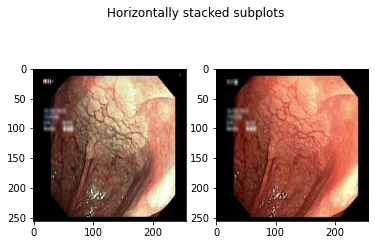

In [85]:
path1 = '../data/wl2nbi/fake_images_ck4/adenoma_WL/video_1/adenoma_WL_video_1_img_0.png'
img1 = imageio.imread(path1)
path2 = '/home/frank/Documentos/UIS/Tesis/Polipos/DataSet/PolypDatasetProcesed/WL/adenoma_WL/video_1/adenoma_WL_video_1_img_0.png'
img2 = imageio.imread(path2)
#resize img2
img2 = resize(img2, (256, 256, 3))
print("shape img1: {}, shape img2: {}".format(img1.shape, img2.shape))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Horizontally stacked subplots')
ax1.imshow(img1)
ax2.imshow(img2)

max of img1: 254, max of img2: 254


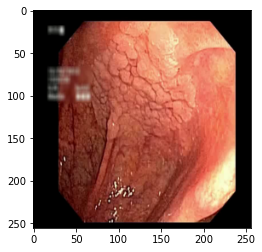

In [86]:
from skimage import img_as_ubyte

img2 = img_as_ubyte(img2)
print("max of img1: {}, max of img2: {}".format(img1.max(), img2.max()))
plt.imshow(img2)

In [87]:
image_eval(img1, img2)

((0.5932617903160833, 0.6062997121902075), (0.7940686462918575+0j))

## Mean values

In [102]:
serrated = [[0.6933283417419189,0.7364174083029753,0.7507937752740217,0j],
[0.5667708600061526,0.6152141012113718,0.6445556382659214,0j],
[0.5137096807274293,0.5642924025278223,0.5768530230518208,0.0003048371483912276j],
[0.511863837279645,0.5715272915380976,0.5805381713609674,0.00023996559482026132j],
[0.51521196055689,0.575813949461668,0.5854153620798005,0.00019113179268012573j],
[0.5014234775763512,0.5662403922219839,0.5605071235873568,0.0010116544260499155j],
[0.5017454881990161,0.5686624837561811,0.5629718157937629,0.0009237320615789347j],
[0.49601722498815287,0.5649112878251747,0.5605639848669765,0.0007874297592248342j],
[0.4899749253384816,0.5605684802499571,0.5562615275827817,0.0006859959846701623j],
[0.48495816146091075,0.5525277391822745,0.5508438789575477,0.0007761492506541801j],
[0.4877577768404704,0.5552670972213449,0.5542586510410945,0.0007491431041824186j],
[0.5007057269419221,0.5666441837655737,0.5645502693332317,0.0007123055665419055j],
[0.4984315298633448,0.5609605392455592,0.5691087778371414,0.0006446686761996368j],
[0.4976054370599836,0.5575864192568941,0.5619824045011892,0.0006754424203619068j],
[0.49882609712919057,0.5572273061544609,0.5660594885079583,0.0006351461396016795j]]

In [103]:
hyperplastic = [[0.49836667896295356,0.5568727986905041,0.5626307338124402,0.0007017327798564129j],
[0.49650604188926084,0.5549859909373263,0.5574010909278451,0.0007290586394584903j],
[0.49437744522536337,0.5529931656644197,0.5543997671006342,0.0008866539255378116j],
[0.5031281256545242,0.560476716179607,0.5613778645251193,0.0008437779931362847j],
[0.5024483913165938,0.5599717707006531,0.5586983011816121,0.0008701510157273089j],
[0.49701935171045875,0.557615704416166,0.5499659108761835,0.0008901229354272438j],
[0.5054142366638357,0.565143085227927,0.5533399372327797,0.000980290947274737j],
[0.49699049479281127,0.5570501264193334,0.549833265911306,0.0008957957592196157j],
[0.49922397161227583,0.5598298133187481,0.5518304846799399,0.0008860361904445342j],
[0.5061932309590816,0.5662840600589496,0.5531003634451165,0.0010624978255301624j],
[0.5108280945694095,0.5694879946687098,0.5545991042529099,0.001022784049926924j],
[0.5138966065359512,0.572439523494107,0.5573673340659729,0.0010112293809090803j],
[0.5154531128091858,0.5742759281894984,0.5586247469275131,0.0010000275405789949j],
[0.5059568442976451,0.5651723092189074,0.5443747019711157,0.0019363470946926918j],
[0.5058445728682563,0.5650520332139589,0.5446599449562233,0.001906964243224731j],
[0.5020412861947963,0.561134164434405,0.5412205564030937,0.0018360885216079544j],
[0.5061617912688818,0.5648403661083747,0.544351393384674,0.0017981407461216212j],
[0.5102857140217885,0.5688426018268561,0.5464595103711266,0.00200822058816861j],
[0.511517900647279,0.5704497559389943,0.5481754100667476,0.001974559660834642j],
[0.5106887166067372,0.5691235206082699,0.5474618282326682,0.0019292261723042748j],
[0.5103652689539518,0.569237479013376,0.5474185623903958,0.0019315898198295712j]]

In [104]:
adenoma = [[0.5062710317801276,0.5650546788031529,0.5462920000020791,0.001859516635784607j],
[0.4982682958462537,0.5576075097241069,0.5376956707430609,0.001783578429995726j],
[0.5024009573739877,0.56089707489814,0.5380653010994629,0.0024068157334679605j],
[0.4961742670697282,0.5569561135962411,0.5282968618101535,0.003144157814186716j],
[0.4944589033233481,0.5550297621511368,0.5263048448408284,0.003084557547196031j],
[0.49394918357261347,0.5537190710534081,0.5267965170322136,0.002953000304522362j],
[0.49734612875029166,0.5576802349055486,0.5311258661426047,0.0028385000880244192j],
[0.4958508623746014,0.5577025063051243,0.5307166062326908,0.002850819116501032j],
[0.5011086821892548,0.5625037558078865,0.5305735502249234,0.0032486422296837585j],
[0.49924269056438214,0.5611083587196514,0.528251273404561,0.0034615592143952094j],
[0.5146138440646315,0.5742159369657193,0.5449354364882273,0.0032167209901142924j],
[0.5106069690034418,0.5699117811353414,0.5406360991874715,0.0031575623998559635j],
[0.5069523612035542,0.566632595752374,0.5368538253045778,0.0030803730665806524j],
[0.5045718657151013,0.5659813780620712,0.5319624809930856,0.0035807937468669893j],
[0.510207722200989,0.5720268357462938,0.5318637442712271,0.0038296013264264386j],
[0.5116465232231701,0.5734914014906656,0.5332401407518519,0.003786262894892439j],
[0.5114446745224581,0.5731950462382531,0.5338334783187092,0.003723457586209389j],
[0.5080301320689762,0.5704802533786048,0.5300704479189575,0.003763889307701083j],
[0.5071643133345072,0.570315855083494,0.5293993844834927,0.0037050412616492956j],
[0.5084872971523108,0.5714549042682568,0.5299462869460188,0.0036966664054283206j],
[0.5087143712911484,0.5713346513213431,0.5306230115556377,0.0036657159251978783j],
[0.5075197895131371,0.5715484501564965,0.528502185370921,0.0037863502787635187j],
[0.5054938969263257,0.5697954411364491,0.5258434228804194,0.00375535780601244j],
[0.5060421594129788,0.570197437668934,0.5271691927149148,0.0037319996696169567j],
[0.5040778841566836,0.5711522396024591,0.5240438666803046,0.004372789659922199j],
[0.5027607897496527,0.5702084873930066,0.5224104931329404,0.004410198632103399j],
[0.4987856150309062,0.5661779186469452,0.516313946296851,0.0049555228589437j],
[0.498375240257238,0.565670655870331,0.5152520904818431,0.004936158976412884j],
[0.5024307710882956,0.5691528500338118,0.5188317637578755,0.004792707308293542j],
[0.4891930748099892,0.557469188989178,0.502278851298511,0.005221517655955524j],
[0.48866782334864584,0.5567930776523775,0.5018852912258658,0.005194156682020031j],
[0.4900288457220727,0.5580992553019507,0.5040015229321554,0.00512400522475547j],
[0.48981454795692764,0.5577109158571636,0.5044284835405435,0.005097351015305016j],
[0.4892064784467064,0.5567983626536611,0.5032037225136253,0.005049932346616882j],
[0.48866936747984835,0.5559602808958005,0.5032351810056944,0.004982435932717882j],
[0.48599490062430073,0.5544402301228687,0.4991376339946244,0.005618977563994362j],
[0.48536855807034657,0.5542051651133905,0.4983375936981328,0.005598134781568993j],
[0.4860020275041792,0.5550027118409359,0.4990859083110608,0.005534583349683235j],
[0.4872526560760501,0.5565947366915242,0.5007942232783856,0.005466446681899282j],
[0.4873194482984993,0.5565754812426849,0.5010716322660549,0.005444900496915608j]]

In [112]:
ade = np.mean(adenoma, axis=0)
hyp = np.mean(hyperplastic, axis=0)
ser = np.mean(serrated, axis=0)

In [114]:
ade

array([0.49951287+0.j        , 0.56352131+0.j        ,
       0.52233275+0.j        , 0.        +0.00399777j])

In [115]:
hyp

array([0.50489085+0.j        , 0.56387042+0.j        ,
       0.55177575+0.j        , 0.        +0.00129054j])

In [116]:
ser

array([0.51722204+0.j        , 0.57825741+0.j        ,
       0.58301759+0.j        , 0.        +0.00055584j])